# Рассмотрим сделки по 2Б.Что делать 1С, с 2018 по 2022 год

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
mypath=r'C:\Users\kerie\Scripts\Машинное обучение\1C\Сделки'
names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(names)
names

['2018.xlsx', '2019.xlsx', '2020.xlsx', '2021.xlsx', '2022.xlsx']

In [3]:
excl_list=[]
for i in names:
    file=f'{mypath}\{i}'
    data=pd.read_excel(file)
     # Год
    Year=i[:i.index('.')]
    data["Год_сделки"] = int(Year)
    excl_list.append(data)

In [4]:
data = pd.concat(excl_list)
data.shape

(4912, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 0 to 780
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Контрагент              4912 non-null   object        
 1   Номер                   4912 non-null   object        
 2   ДоговорКонтрагента      4912 non-null   object        
 3   СуммаДокумента          4912 non-null   float64       
 4   чдДатаПервойОплаты      4912 non-null   datetime64[ns]
 5   НаправлениеБизнеса      4912 non-null   object        
 6   Ссылка                  4912 non-null   object        
 7   ПометкаУдаления         4912 non-null   object        
 8   Код                     4912 non-null   int64         
 9   ИНН                     4842 non-null   object        
 10  Наименование            4912 non-null   object        
 11  ВидДеятельности         1483 non-null   object        
 12  ЮрФизЛицо               4912 non-null   object   

# Пустые строки:
- СистемаНалогообложения (2488);
- ВыручкаОтПродаж (1560).

# Выручка компаний

In [6]:
print('Выручка клиентов из официальных источников')
print()
print(data['ВыручкаОтПродаж'].median(),'Медиана по выручке')
print(round(data['ВыручкаОтПродаж'].mean(),2),'Среднее значение по выручке')
print(data['ВыручкаОтПродаж'].max(),'Максимальное значение по выручке')
print(data['ВыручкаОтПродаж'].min(),'Минимальное значение по выручке')

Выручка клиентов из официальных источников

85495500.0 Медиана по выручке
505477563.67 Среднее значение по выручке
33491886000.0 Максимальное значение по выручке
0.0 Минимальное значение по выручке


In [8]:
quantile_15 = data['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = data['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = data['ВыручкаОтПродаж'].quantile(0.25)
median=data['ВыручкаОтПродаж'].median()
quantile_75 = data['ВыручкаОтПродаж'].quantile(0.75)

In [9]:
print('Квартили распределения')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения

У 15% клиентов, у которых была сделка, 
выручка меньше 9238899.999999998
а у 85% больше 9238899.999999998


У 20% клиентов, у которых была сделка, 
выручка меньше 17016000.0
а у 80% больше 17016000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 26484000.0
а у 75% больше 26484000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 85495500.0
а у 50% больше 85495500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 253179250.0
а у 25% больше 253179250.0


# Анализ по системам налогообложения

In [10]:
# Заменим СистемаНалогообложения пустые значения на не известно 
data['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [11]:
data_n_cnt_y=data.groupby(['СистемаНалогообложения','Год_сделки'],as_index=False) \
.aggregate({'Код':"count",'СуммаДокумента':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by=['СистемаНалогообложения','Год_сделки'], ascending=False)

data_n_cnt_y['% Суммы Сделок']=round(data_n_cnt_y['СуммаДокумента']*100/data_n_cnt_y['СуммаДокумента'].sum(),1)
data_n_cnt_y['% Количества Сделок']=round(data_n_cnt_y['Количество сделок']*100/data_n_cnt_y['Количество сделок'].sum(),1)

data_n_cnt_y[['Год_сделки','СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаДокумента','% Суммы Сделок']]

,Год_сделки,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаДокумента,% Суммы Сделок
42,2022,УСНО 6%,77,1.6,310180.00,0.3
41,2021,УСНО 6%,103,2.1,432130.00,0.5
40,2020,УСНО 6%,58,1.2,246805.00,0.3
39,2019,УСНО 6%,145,3.0,1006800.00,1.1
38,2018,УСНО 6%,240,4.9,1318905.00,1.5
37,2022,УСНО 15%,34,0.7,569520.00,0.6
36,2021,УСНО 15%,41,0.8,168010.00,0.2
35,2020,УСНО 15%,26,0.5,136050.00,0.2
34,2019,УСНО 15%,56,1.1,359550.00,0.4
33,2018,УСНО 15%,65,1.3,448800.00,0.5


In [12]:
data_n_cnt=data.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'Код':"count",'СуммаДокумента':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='СуммаДокумента', ascending=False)

data_n_cnt['% Суммы Сделок']=round(data_n_cnt['СуммаДокумента']*100/data_n_cnt['СуммаДокумента'].sum(),1)
data_n_cnt['% Количества Сделок']=round(data_n_cnt['Количество сделок']*100/data_n_cnt['Количество сделок'].sum(),1)

data_n_cnt[['СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаДокумента','% Суммы Сделок']]

,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаДокумента,% Суммы Сделок
4,Не известно,2488,50.7,54109549.50,60.4
5,ОСНО,1314,26.8,26245019.00,29.3
8,УСНО 6%,623,12.7,3314820.00,3.7
6,"ОСНО,УСНО",161,3.3,1721389.40,1.9
7,УСНО 15%,222,4.5,1681930.00,1.9
1,Бюджет,39,0.8,1422789.99,1.6
3,ЕСХН,21,0.4,578390.00,0.6
2,ЕНВД,40,0.8,499320.00,0.6
0,Аутсорсинг,4,0.1,66600.00,0.1


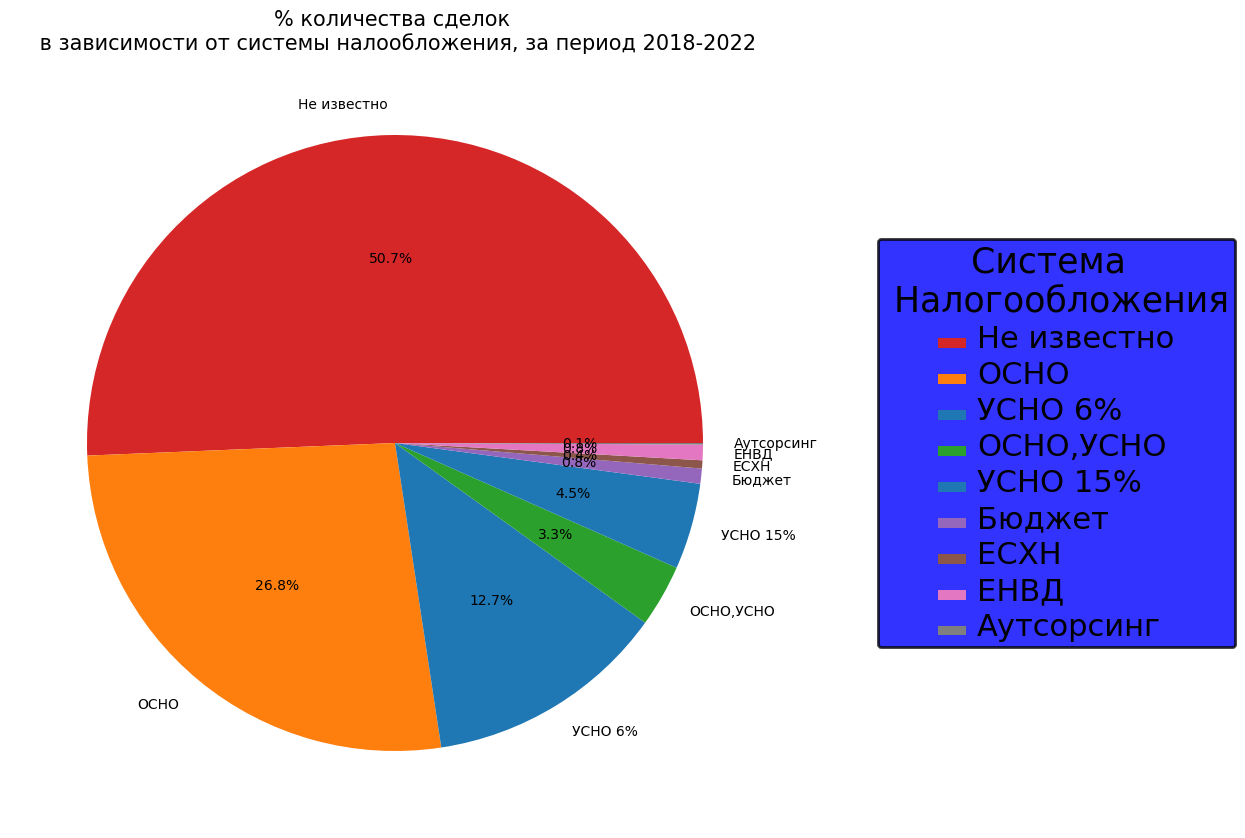

In [13]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% количества сделок \n в зависимости от системы налообложения, за период 2018-2022", fontsize=15)

plt.show()

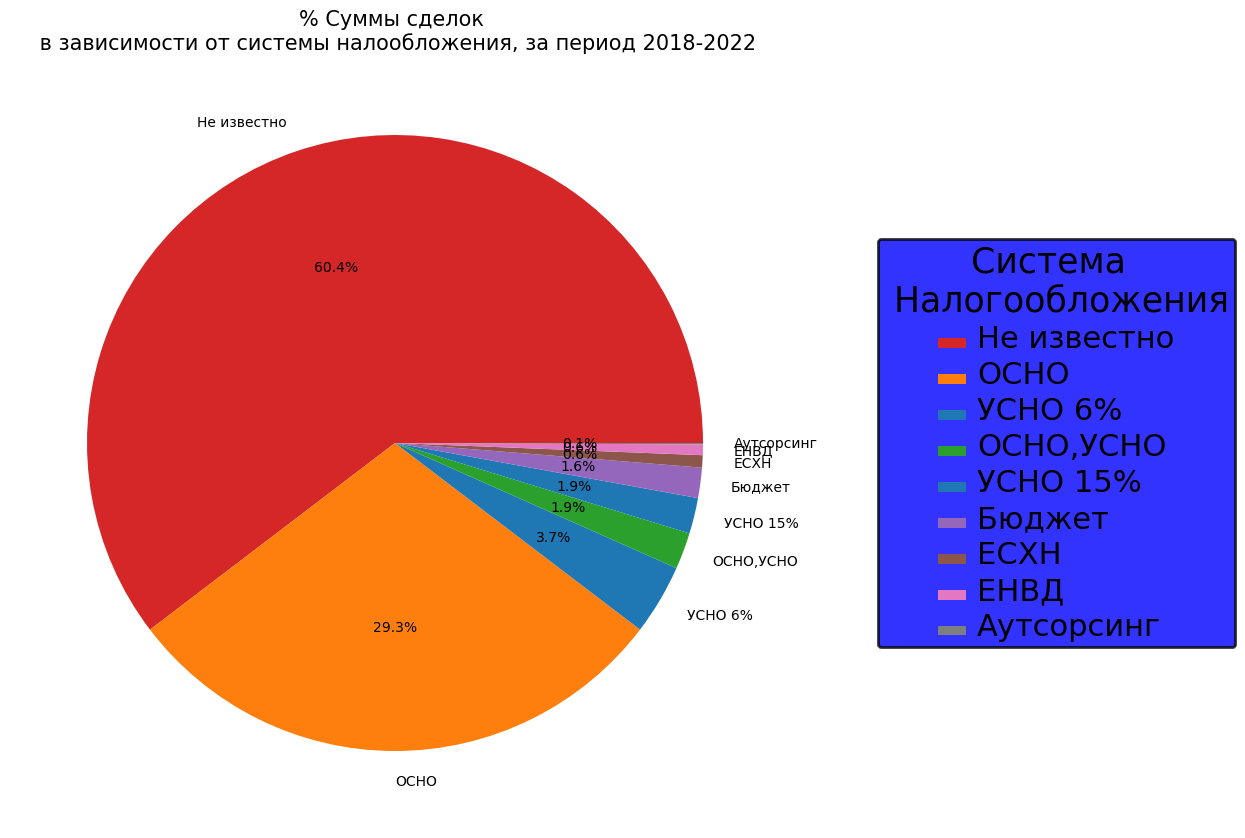

In [14]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['СуммаДокумента'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% Суммы сделок \n в зависимости от системы налообложения, за период 2018-2022", fontsize=15)

plt.show()

# Рассмотрим выручки компаний по 5 системам налогообложения

# Система Налогообложения ОСНО

In [15]:
osno=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 
# Удаляем дубли
osno=osno.drop_duplicates ()

quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

In [16]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 19607650.0
а у 85% больше 19607650.0


У 20% клиентов, у которых была сделка, 
выручка меньше 29708199.999999996
а у 80% больше 29708199.999999996


У 25% клиентов, у которых была сделка, 
выручка меньше 41145000.0
а у 75% больше 41145000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 120524000.0
а у 50% больше 120524000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 358838000.0
а у 25% больше 358838000.0


# Система Налогообложения УСНО 6%

In [17]:
usno_6=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 6%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_6=usno_6.drop_duplicates ()

quantile_15 = usno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_6['ВыручкаОтПродаж'].quantile(0.25)
median=usno_6['ВыручкаОтПродаж'].median()
quantile_75 =usno_6['ВыручкаОтПродаж'].quantile(0.75)

In [18]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 2892800.0
а у 85% больше 2892800.0


У 20% клиентов, у которых была сделка, 
выручка меньше 5709000.000000001
а у 80% больше 5709000.000000001


У 25% клиентов, у которых была сделка, 
выручка меньше 8598000.0
а у 75% больше 8598000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 26700000.0
а у 50% больше 26700000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 59711500.0
а у 25% больше 59711500.0


# Система Налогообложения ОСНО,УСНО

In [19]:
ou=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО,УСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
ou=ou.drop_duplicates ()

quantile_15 = ou['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = ou['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = ou['ВыручкаОтПродаж'].quantile(0.25)
median=ou['ВыручкаОтПродаж'].median()
quantile_75 =ou['ВыручкаОтПродаж'].quantile(0.75)

In [20]:
print('Квартили распределения системы налогообложения ОСНО,УСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО,УСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 5541000.0
а у 85% больше 5541000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 8613000.0
а у 80% больше 8613000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 14282500.0
а у 75% больше 14282500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 37735500.0
а у 50% больше 37735500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 136963000.0
а у 25% больше 136963000.0


# Система Налогообложения УСНО 15%

In [21]:
usno_15=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 15%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_15=usno_15.drop_duplicates ()

quantile_15 = usno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_15['ВыручкаОтПродаж'].quantile(0.25)
median=usno_15['ВыручкаОтПродаж'].median()
quantile_75 =usno_15['ВыручкаОтПродаж'].quantile(0.75)

In [22]:
print('Квартили распределения системы налогообложения УСНО 15%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%

У 15% клиентов, у которых была сделка, 
выручка меньше 4619900.0
а у 85% больше 4619900.0


У 20% клиентов, у которых была сделка, 
выручка меньше 7732600.000000002
а у 80% больше 7732600.000000002


У 25% клиентов, у которых была сделка, 
выручка меньше 9391500.0
а у 75% больше 9391500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 30960500.0
а у 50% больше 30960500.0


У 75% клиентов, у которых была сделка, 
выручка меньше 56122000.0
а у 25% больше 56122000.0


# Вывод
- Системы налогообложения в порядке приоритета:
- а) ОСНО выручка компаний от 19 млн;
- b) УСНО 6% выручка компаний от 2.8 млн;
- c) ОСНО,УСНО выручка компаний от 5 млн.
- d) УСНО 15% выручка компаний от 4 млн.